In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
titanic = pd.read_csv("titanic.csv")

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
titanic.shape # to get number rows and columns

(891, 12)

In [7]:
titanic.count()# gives the number of values present in each column

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [8]:
titanic.info()# gives the information about the null n non null vales in each columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Missing data - we can use seaborn to create a single heatemap to see where we are missing data

In [10]:
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

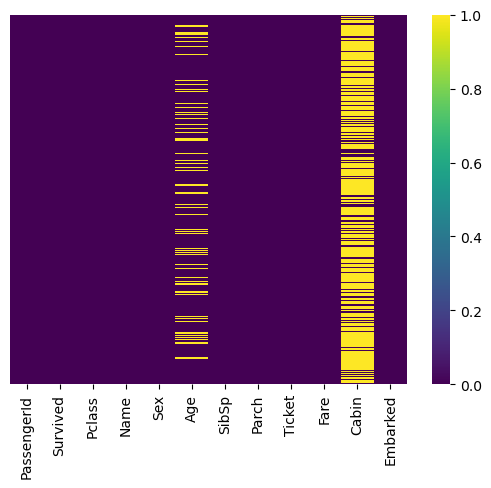

In [11]:
sb.heatmap(titanic.isnull(),yticklabels= False, cmap = 'viridis')

In [12]:
# # almost 20% of the age data is missing so here we can replace the missing data and in cabin column most of the data is 
# missing so we can drop this columns later or change it to 0 or 1

<AxesSubplot:xlabel='Survived', ylabel='count'>

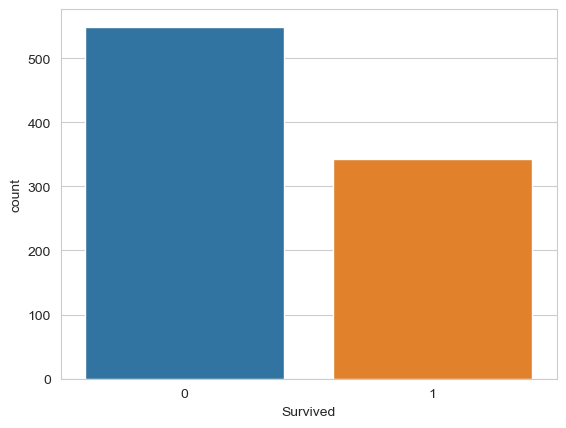

In [13]:
sb.set_style('whitegrid')
sb.countplot(x = 'Survived', data= titanic )

<AxesSubplot:xlabel='Survived', ylabel='count'>

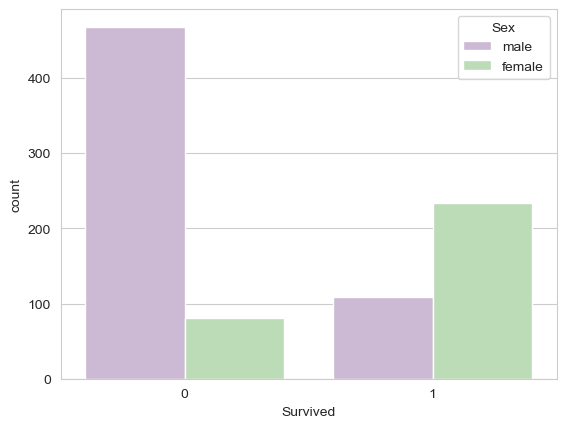

In [14]:
sb.set_style('whitegrid')
sb.countplot(x= 'Survived', hue ='Sex', data = titanic, palette = 'PRGn')

<AxesSubplot:xlabel='Survived', ylabel='count'>

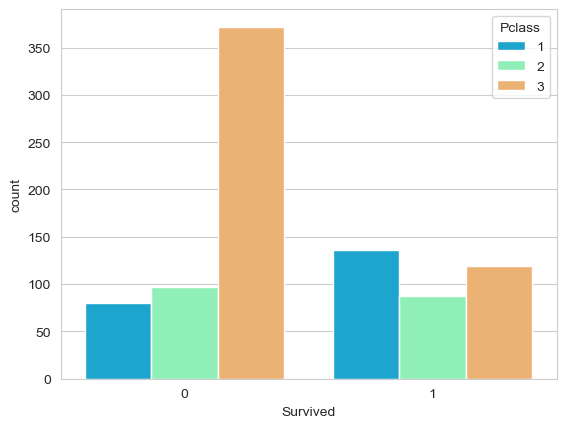

In [15]:
sb.set_style('whitegrid')
sb.countplot(x = 'Survived', hue = 'Pclass', palette='rainbow', data= titanic,)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

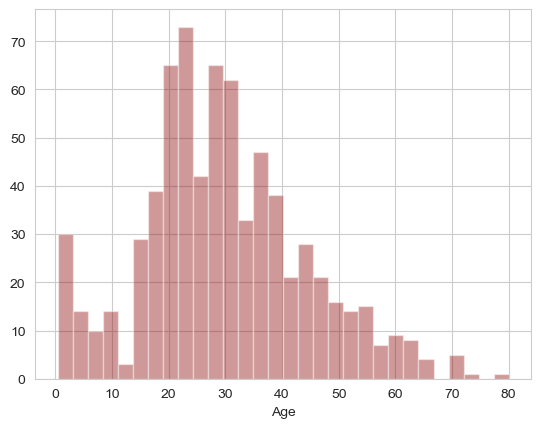

In [16]:
sb.distplot(titanic['Age'].dropna(),bins= 30, kde= False, color = 'darkred')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

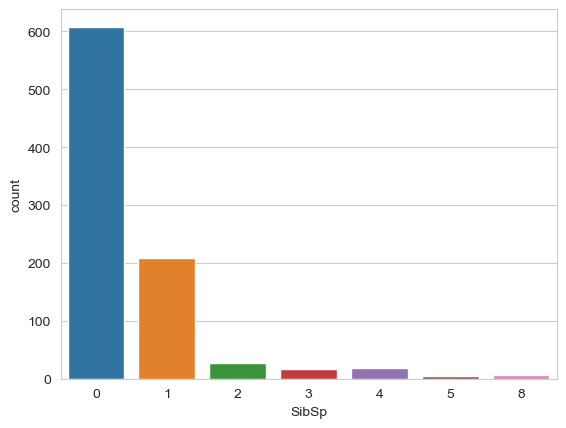

In [17]:
sb.countplot(x='SibSp', data = titanic)

<AxesSubplot:>

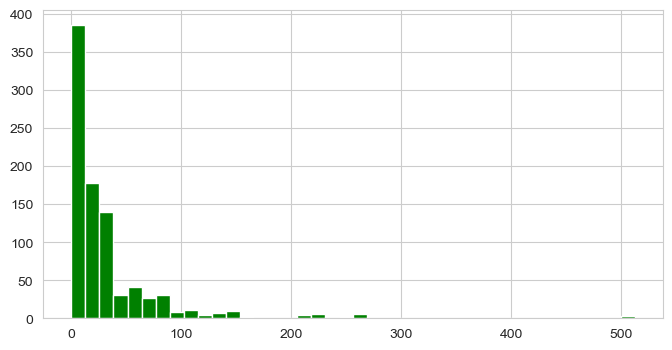

In [18]:
titanic['Fare'].hist(color= 'green', bins = 40, figsize= (8,4))

In [19]:
#data cleaning - we want to fill in missing age instead of just dropping age data. one way is by filling the mean age of 
#all the passangers(imputation). however we can check the average age by passenger class 

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

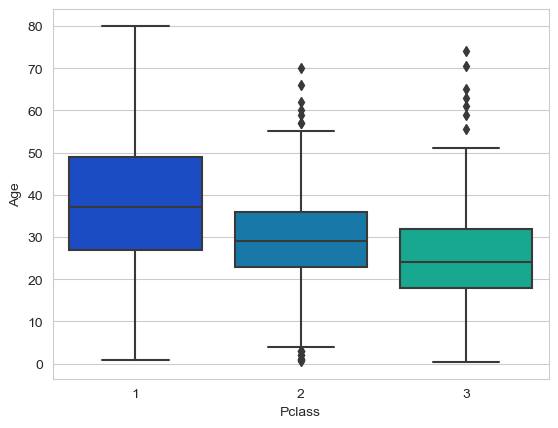

In [20]:
sb.boxplot(x='Pclass', y='Age', data = titanic, palette='winter')

In [21]:
# we can see that wealthier person is in higher class tends to be older.so we will use the average age values to impute
#based on pclass and age

In [22]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        
        elif Pclass == 2:
            return 29
    
        else: 
            return 24
    
    else:
        return Age

In [23]:
titanic['Age'] = titanic [['Age','Pclass']].apply(impute_age,axis =1) #now apply that function and check heat map again

<AxesSubplot:>

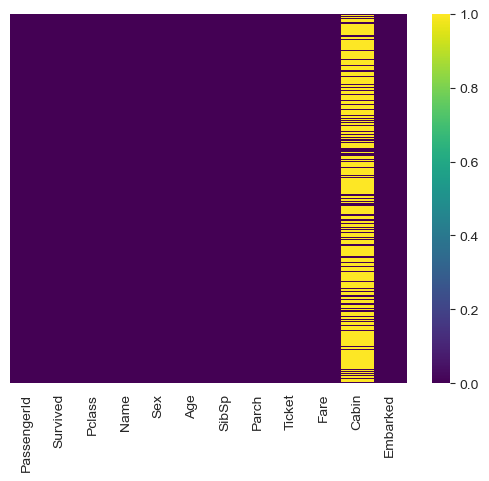

In [24]:
sb.heatmap(titanic.isnull(), yticklabels = False, cmap = 'viridis')

In [25]:
# lets go ahead and drop the cabin column and row in embarked thats is nan

In [26]:
titanic.drop('Cabin', axis =1, inplace = True)

In [27]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

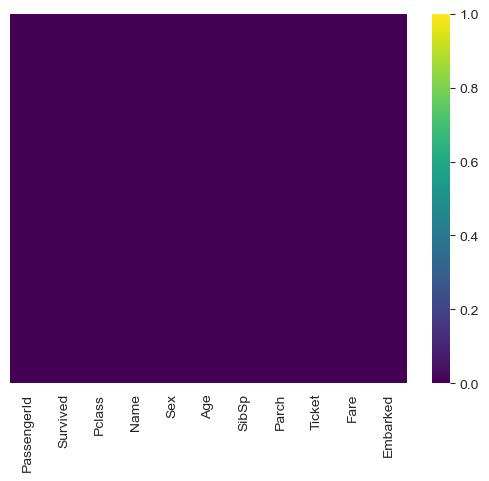

In [28]:
sb.heatmap(titanic.isnull(), yticklabels = False, cmap = 'viridis')

In [29]:
#coverting the categorical features into numerical values
#we will need to convert features to dummy variables using pandas 

In [30]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [31]:
sex = pd.get_dummies(titanic['Sex'],drop_first = True)
embark = pd.get_dummies(titanic['Embarked'],drop_first = True)

In [41]:
titanic.drop(['Ticket','Name','sex','Embarked'],axis=1, inplace = True)

KeyError: "['Ticket', 'Name', 'sex', 'Embarked'] not found in axis"

In [40]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [37]:
titanic = pd.concat([titanic,sex,embark], axis=1)

In [38]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
